## Naive Baye's Machine Learning Algorithms Implementation

### Step 1: Import Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Step 2: Load the Dataset

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

### Convert to DataFrame for better understanding

In [4]:
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Step 3: Feature and Target Split

In [5]:
X = df[iris.feature_names]   # Features
y = df['target']             # Target (0,1,2 for 3 species)

### Step 4: Split Dataset into Train and Test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (105, 4)
Testing set size: (45, 4)


### Step 5: Initialize and Train Naïve Bayes Model

In [8]:
model = GaussianNB()
model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09



### Step 6: Make Predictions

In [9]:
y_pred = model.predict(X_test)

### Step 7: Evaluate Model Performance

In [10]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


✅ Accuracy: 0.9777777777777777

📊 Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

🧾 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



### Step 8: Test on New Data

In [11]:
new_data = np.array([[5.1, 3.5, 1.4, 0.2]])   # Example new flower
prediction = model.predict(new_data)
print(f"Predicted species: {iris.target_names[prediction][0]}")


Predicted species: setosa


f:\clg\Data Science\1-Python\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


### Step 9: Visual Understanding

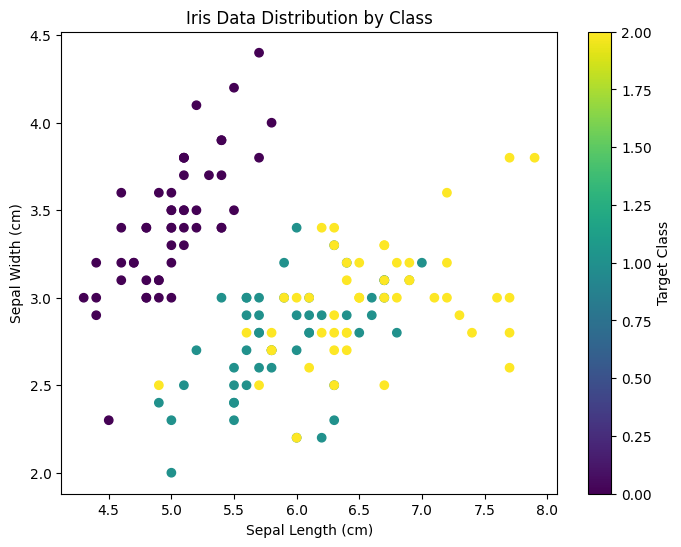

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['target'], cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Data Distribution by Class')
plt.colorbar(label='Target Class')
plt.show()
